<a href="https://colab.research.google.com/github/kingajutrzenka/Mood-analysis/blob/main/Data_manipulation_and_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mood Analysis**

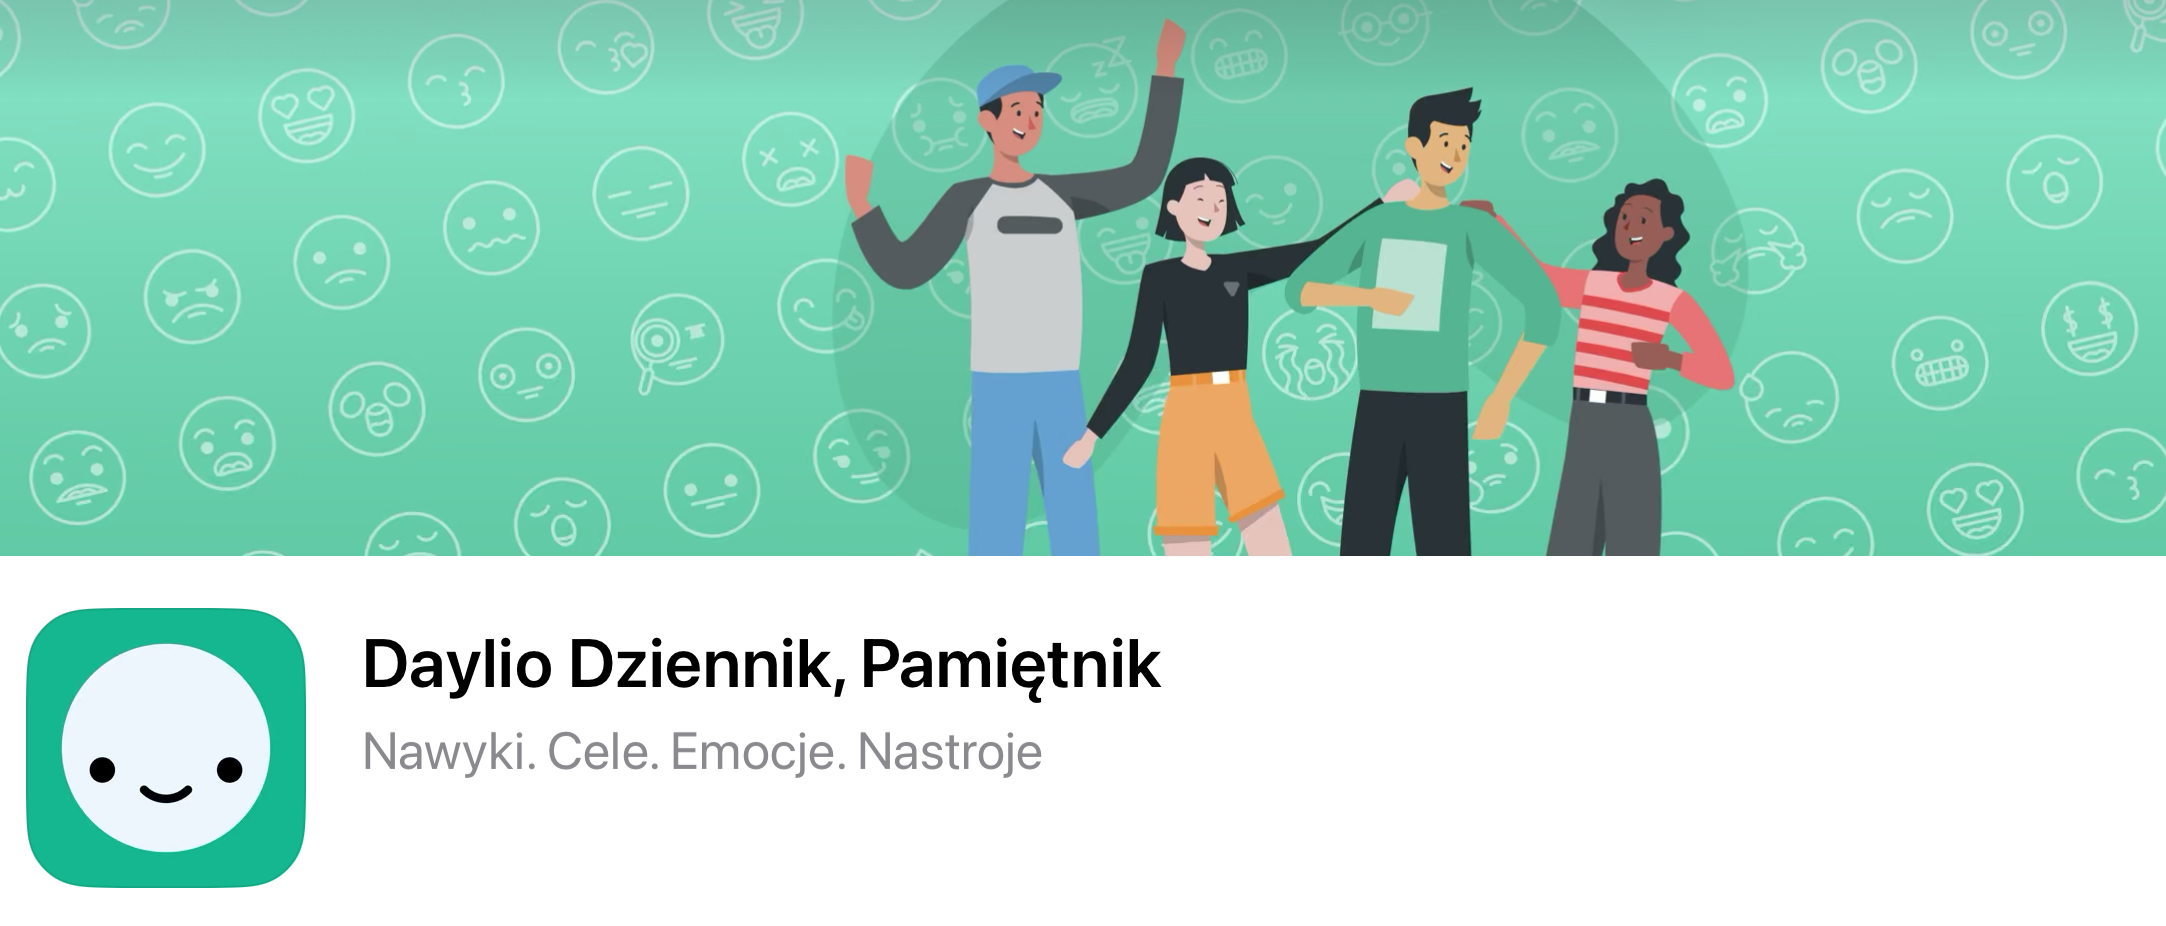

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [23]:
df = pd.read_excel('do textu .xlsx', header= 1)
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [24]:
df['time'] = pd.to_datetime(df['time'])
df['hour'] = df['time'].dt.hour

/tmp/ipython-input-24-423188262.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   full_date   940 non-null    object        
 1   date        940 non-null    object        
 2   weekday     940 non-null    object        
 3   time        940 non-null    datetime64[ns]
 4   sub_mood    940 non-null    object        
 5   activities  893 non-null    object        
 6   mood        940 non-null    object        
 7   hour        940 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(6)
memory usage: 55.2+ KB


In [26]:
del df['full_date']
df.head()

,date,weekday,time,sub_mood,activities,mood,hour
0,Apr-16,Friday,2025-07-23 20:00:00,yolo,reading | Art | prayer | fasting | walk | med...,Good,20
1,Apr-15,Thursday,2025-07-23 02:37:00,focused,reading | learning | Art | prayer | fasting ...,Good,2
2,Apr-14,Wednesday,2025-07-23 02:39:00,confused,reading | learning | prayer | fasting | Qura...,Normal,2
3,Apr-13,Tuesday,2025-07-23 02:38:00,wondering,reading | learning | Art | prayer | fasting ...,Normal,2
4,Apr-12,Monday,2025-07-23 21:52:00,angry,reading | learning | fasting | walk | medita...,Awful,21


mood
Good       487
Normal     186
Amazing    167
Awful       51
Bad         49
Name: count, dtype: int64


<Axes: xlabel='mood'>

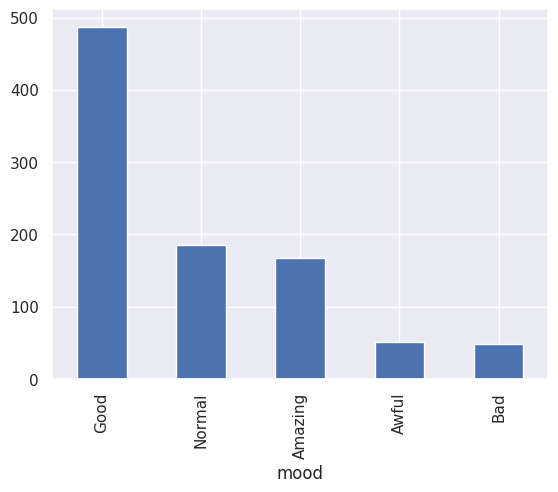

In [27]:
# Number of the occurrence of a given mood
mood = df['mood'].value_counts()
print(mood)
mood.plot(kind = 'bar')
# The most occurring mood is good, the rare mood are bad and awful. These are very well statistic 🙂.

<Axes: xlabel='hour'>

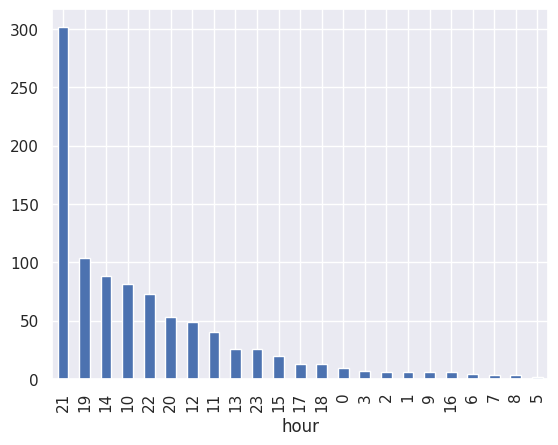

In [28]:
common_time = df['hour'].value_counts()
common_time.plot(kind = 'bar')
# the most popular time when people use this app is 21:00.

hour
0       5
1       4
2       1
3       6
5       1
6       2
8       1
9       2
10     38
11     22
12     36
13     16
14     46
15      9
16      5
17      5
18      4
19     54
20     26
21    149
22     40
23     15
Name: mood, dtype: int64


"\nThe most common time when the mood is 'good' is 21:00, as well as the periods from 10:00 to 14:00 and from 19:00 to 22:00.\nThe least common time is from 00:00 to 09:00, but this is not a surprise.\nReally intresting is a fact: people often choose good mood at night than at afternoon.\n"

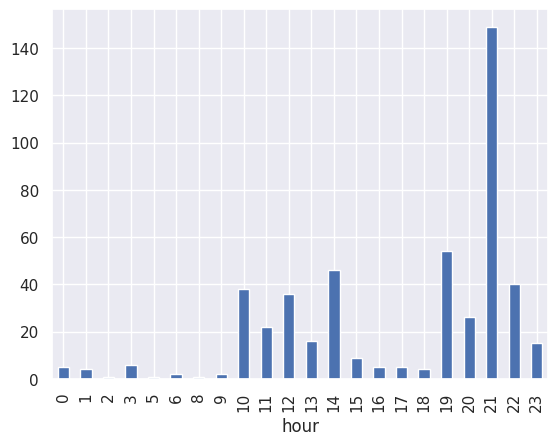

In [29]:
mood1 = df[df['mood'] == 'Good']
mood_and_time = mood1.groupby('hour')['mood'].count()
print(mood_and_time)
mood_and_time.plot(kind = 'bar')
"""
The most common time when the mood is 'good' is 21:00, as well as the periods from 10:00 to 14:00 and from 19:00 to 22:00.
The least common time is from 00:00 to 09:00, but this is not a surprise.
Really intresting is a fact: people often choose good mood at night than at afternoon.
"""

hour
7      1
8      1
9      2
10     7
11     4
12     2
13     1
14     6
15     2
17     1
19     5
20     3
21    10
22     4
Name: mood, dtype: int64


"\nThe most common time when the mood is 'bad' is 21:00, 10:00, 14:00.\nThe least common time is from 23:00 to 06:00, but this is not a surprise.\nThe least common time is 16:00 and 18:00 too and this is intresting 🧐.\n"

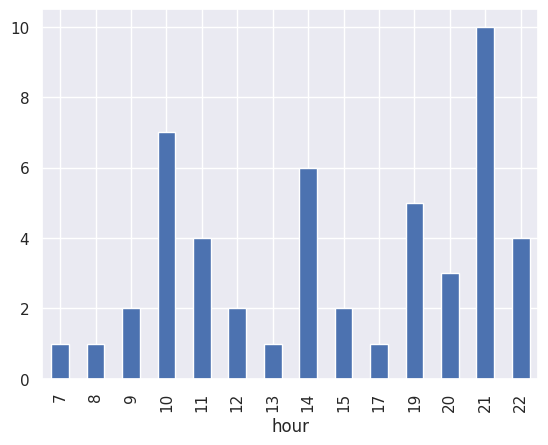

In [30]:
mood2 = df[df['mood'] == 'Bad']
mood_and_time = mood2.groupby('hour')['mood'].count()
print(mood_and_time)
mood_and_time.plot(kind = 'bar')
"""
The most common time when the mood is 'bad' is 21:00, 10:00, 14:00.
The least common time is from 23:00 to 06:00, but this is not a surprise.
The least common time is 16:00 and 18:00 too and this is intresting 🧐.
"""

hour
7      1
10     6
11     1
13     2
14     9
15     2
17     2
18     2
19    12
20     4
21     7
22     3
Name: mood, dtype: int64


"\nThe most common time when the mood is 'awful' is 19:00, 21:00, 10:00, 14:00.\nThe least common time is from 23:00 to 6:00, from 08:00 to 09:00, 12:00 and 16:00.\n"

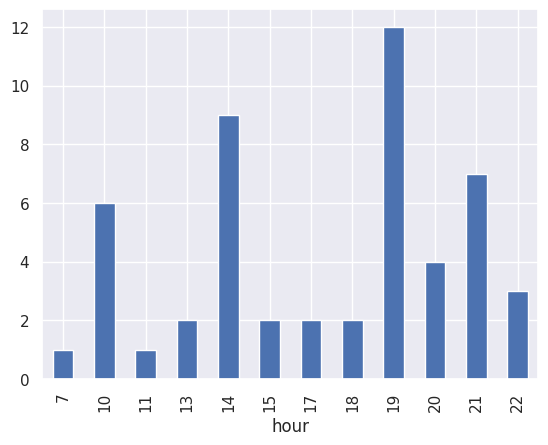

In [31]:
mood3 = df[df['mood'] == 'Awful']
mood_and_time = mood3.groupby('hour')['mood'].count()
print(mood_and_time)
mood_and_time.plot(kind = 'bar')
"""
The most common time when the mood is 'awful' is 19:00, 21:00, 10:00, 14:00.
The least common time is from 23:00 to 6:00, from 08:00 to 09:00, 12:00 and 16:00.
"""

hour
0      3
1      2
2      3
3      1
6      1
8      1
9      2
10    26
11    10
12     7
13     5
14    23
15     4
16     1
17     1
18     6
19    16
20     9
21    50
22    11
23     4
Name: mood, dtype: int64


"\nThe most common time when the mood is 'normal' is 21:00, 10:00, 19:00 and 14:00.\nThe least is from 4:00 to 5:00.\nIt is intresting, because 'neutral' isn't the most chosen mood, but it's choose in most of the time.\n"

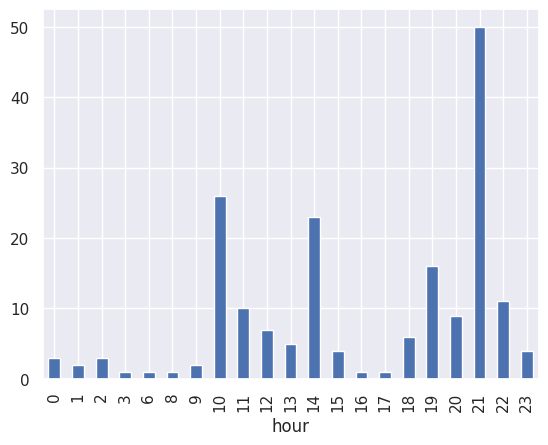

In [32]:
mood4 = df[df['mood'] == 'Normal']
mood_and_time = mood4.groupby('hour')['mood'].count()
print(mood_and_time)
mood_and_time.plot(kind = 'bar')
"""
The most common time when the mood is 'normal' is 21:00, 10:00, 19:00 and 14:00.
The least is from 4:00 to 5:00.
It is intresting, because 'neutral' isn't the most chosen mood, but it's choose in most of the time.
"""

hour
0      1
2      2
5      1
6      1
7      1
10     4
11     3
12     4
13     2
14     4
15     3
17     4
18     1
19    17
20    11
21    86
22    15
23     7
Name: mood, dtype: int64


"\nThe most common time when the mood is 'amazing' is 21:00 and with a large advantage.\nThe least is 01:00, from 03:00 to 04:00, from 09:00 to 10:00, 16:00.\nIn this situation large avantage choose mood 'amazing' at 21:00 is really intresting in my opinion and I want to read more about this situation 🧐📚.\n"

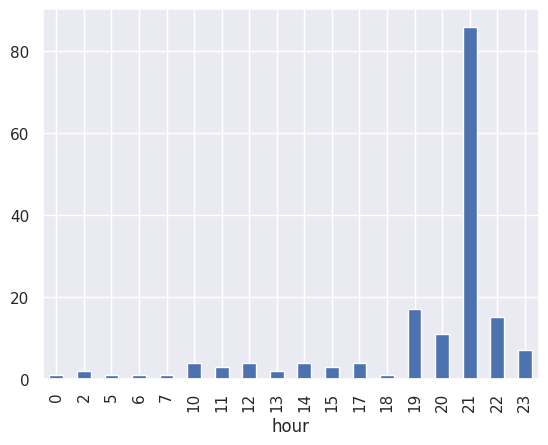

In [33]:
mood5 = df[df['mood'] == 'Amazing']
mood_and_time = mood5.groupby('hour')['mood'].count()
print(mood_and_time)
mood_and_time.plot(kind = 'bar')
"""
The most common time when the mood is 'amazing' is 21:00 and with a large advantage.
The least is 01:00, from 03:00 to 04:00, from 09:00 to 10:00, 16:00.
In this situation large avantage choose mood 'amazing' at 21:00 is really intresting in my opinion and I want to read more about this situation 🧐📚.
"""

These analyses aren't perfect, because some hours are more popular for using this app than others. For example in 4/5 mood the most frequlently selected hour is 21:00, but it's also the most popular hour to use the app in general. However, sometimes for example in 'Amazing' mood, advantage selected 21:00 is really big, so in my opinion might be something real in statement: people feel happier in evenig. In the other hand, resarchers from the Univeristy Collage London
[link to resarch](https://mentalhealth.bmj.com/lookup/doi/10.1136/bmjment-2024-301418)
based on 1 million observations take a concluded that: people tend to be happier in the morning 🌞 and least happy at night 🌛.

mood   Amazing     Awful       Bad      Good    Normal
hour                                                  
0     0.111111  0.000000  0.000000  0.555556  0.333333
1     0.000000  0.000000  0.000000  0.666667  0.333333
2     0.333333  0.000000  0.000000  0.166667  0.500000
3     0.000000  0.000000  0.000000  0.857143  0.142857
5     0.500000  0.000000  0.000000  0.500000  0.000000
6     0.250000  0.000000  0.000000  0.500000  0.250000
7     0.333333  0.333333  0.333333  0.000000  0.000000
8     0.000000  0.000000  0.333333  0.333333  0.333333
9     0.000000  0.000000  0.333333  0.333333  0.333333
10    0.049383  0.074074  0.086420  0.469136  0.320988
11    0.075000  0.025000  0.100000  0.550000  0.250000
12    0.081633  0.000000  0.040816  0.734694  0.142857
13    0.076923  0.076923  0.038462  0.615385  0.192308
14    0.045455  0.102273  0.068182  0.522727  0.261364
15    0.150000  0.100000  0.100000  0.450000  0.200000
16    0.000000  0.000000  0.000000  0.833333  0.166667
17    0.30

<Axes: xlabel='hour'>

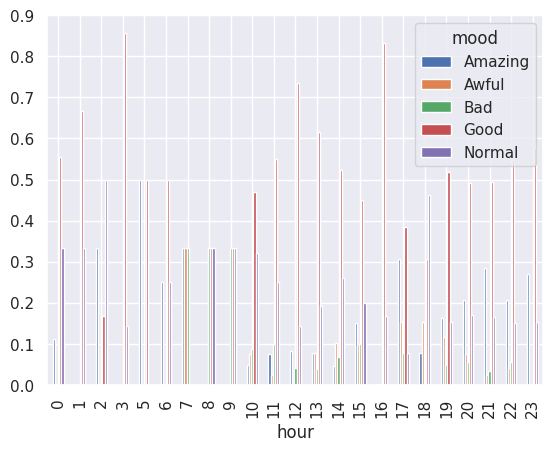

In [34]:
mood_use =  df.groupby(['hour', 'mood']).size().unstack(fill_value=0)
mood_time = mood_use.div(mood_use.sum(axis=1), axis=0)
print(mood_time)
mood_time.plot(kind = 'bar')

In this analysis, I made a graph showing number of occurance mood in each hour. In this analisis i got similar results to my previous analyses. Hoever is imortant too, because some mood like 'awful' seemd rarly in general scale, but is often in hours scale.

weekday    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday
mood                                                                          
Amazing  0.125749  0.191617  0.143713  0.131737  0.143713  0.131737   0.131737
Awful    0.176471  0.137255  0.137255  0.078431  0.078431  0.117647   0.274510
Bad      0.102041  0.061224  0.122449  0.122449  0.142857  0.244898   0.204082
Good     0.135524  0.133470  0.147844  0.156057  0.154004  0.137577   0.135524
Normal   0.161290  0.145161  0.118280  0.145161  0.112903  0.172043   0.145161


<Axes: xlabel='mood'>

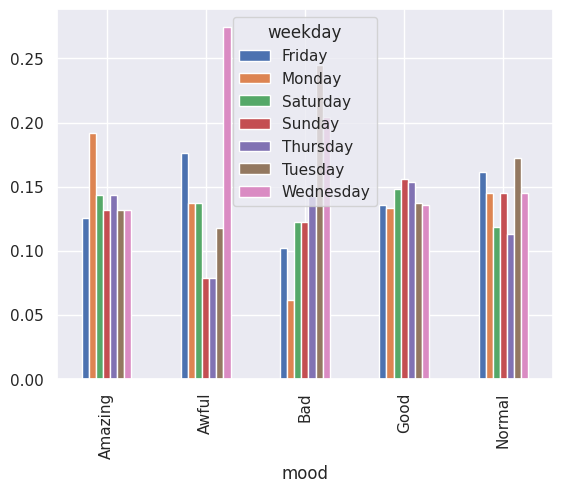

In [35]:
weekday_use =  df.groupby(['mood', 'weekday']).size().unstack(fill_value=0)
weekday_mood = weekday_use.div(weekday_use.sum(axis=1), axis=0)
print(weekday_mood)
weekday_mood.plot(kind = 'bar')

I analysed the impact of weekday on mood.
People feel most common:
- amazing on monday
- awful on wednesday, but friday was often choosed too
- bad on tuesday, but wednesday was often choosed too
- good is similar all weekday
- normal is similar all weekday

sub_mood
blessed           174
focused           111
yolo              100
excited            91
wondering          64
confused           64
hungry             53
Cool               37
over the moon      34
weak               31
Chill              30
worried            28
meh                27
good               19
triggered          18
angry              16
sad af             13
scared              9
sick                8
happiest day        5
awful               4
bad                 4
Name: count, dtype: int64


<Axes: xlabel='sub_mood'>

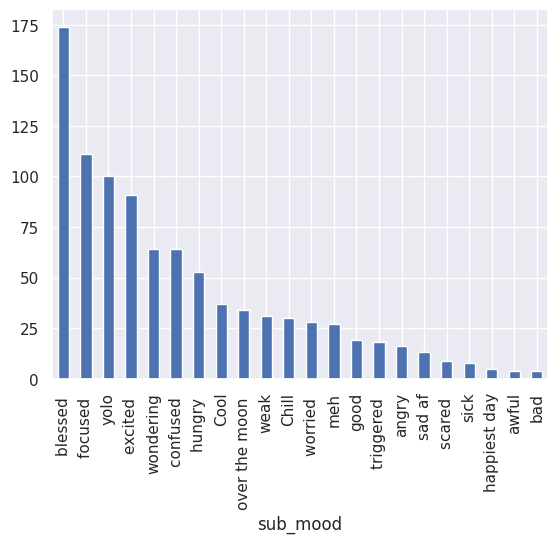

In [36]:
sub_mood= df['sub_mood'].value_counts()
print(sub_mood)
sub_mood.plot(kind = 'bar')

The most common sub mood are blessed and focused.
The least are awful and bad.

**Summary**

These analyses show the relationship between weekday or hour and mood. Although in some articles we can read about other hours and days when people are more or less happy, but in this analisis show above all, dependence between these thinks.

In [49]:
df.to_csv('mood_analysis.csv', index=False)